In [1]:
from pathlib import Path

In [2]:
from textblob import TextBlob


In [3]:
moby = TextBlob(Path('moby_dick.txt').read_text())

In [4]:
type(moby)

textblob.blob.TextBlob

In [6]:
moby.sentences[20]

Sentence("This animal is named from roundness
or rolling; for in Dan.")

In [11]:
moby_20 = moby.sentences[20]
print(moby_20.tags)



[('This', 'DT'), ('animal', 'NN'), ('is', 'VBZ'), ('named', 'VBN'), ('from', 'IN'), ('roundness', 'NN'), ('or', 'CC'), ('rolling', 'NN'), ('for', 'IN'), ('in', 'IN'), ('Dan', 'NNP')]


In [12]:
moby_20.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [23]:
moby.word_counts['moby' or 'Moby']

79

In [24]:
moby.word_counts["dick"]

80

In [31]:
moby.word_counts["ahab" or "Ahab"]


500

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chinchuharris/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
items_words = moby.word_counts.items()

#dict_items([('moby-dick', 1),
#items_words

items_words = [i for i in items_words if i[0] not in stop_words]

items_words[200:211]

[('hand', 203),
 ('xcv.—the', 1),
 ('cassock', 3),
 ('xcvi.—the', 1),
 ('try-works', 19),
 ('xcvii.—the', 1),
 ('lamp', 19),
 ('xcviii.—stowing', 1),
 ('clearing', 6),
 ('xcix.—the', 1),
 ('doubloon', 21)]

In [45]:
from operator import itemgetter

sorted_items = sorted(items_words, key=itemgetter(1), reverse=True)

top = sorted_items[1:15]

new_top = top[2: ]

new_top

[('whale', 1095),
 ('one', 902),
 ('like', 576),
 ('upon', 563),
 ('ahab', 500),
 ('man', 490),
 ('ye', 466),
 ('ship', 462),
 ('old', 441),
 ('would', 429),
 ('sea', 381),
 ('though', 366)]

In [46]:
import pandas as pd

df = pd.DataFrame(new_top, columns=["Word", "Count"])

df

,Word,Count
0,whale,1095
1,one,902
2,like,576
3,upon,563
4,ahab,500
5,man,490
6,ye,466
7,ship,462
8,old,441
9,would,429


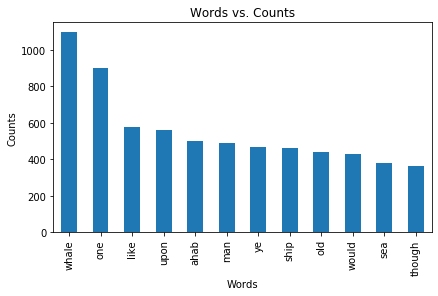

In [48]:
axes = df.plot.bar(x='Word', y='Count', legend=False)

import matplotlib.pyplot as pt

pt.gcf().tight_layout()
pt.xlabel('Words')
pt.ylabel('Counts')
pt.title('Words vs. Counts')
pt.show()›